In [1]:
import numpy as np
import pandas as pd

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df_gunung = pd.read_csv('/content/drive/My Drive/dataset/datagunung_lvl.csv',delimiter=',')
df_gunung = df_gunung.rename(columns={"Id": "mountain_id"})
df_gunung.head()

,mountain_id,Daerah,Nama_Gunung,Ketinggian,Lokasi,Trek,Jalur,Simaksi,Level
0,101,Jawa barat,Gunung Cermai,"3,078","Kuningan, Majalengka, dan Cirebon.",Tanah Kering,"Jalur Apuy, Linggarjati dan Jalur Palutungan",Rp30.000,1
1,102,Jawa barat,Gunung Puntang,"2,223",Kab. Bandung,Tanah kering,-,Rp40.000,1
2,103,Jawa barat,Gunung Papandayan,"2,666",Kab. Garut.,bebatuan,-,Rp60.000,1
3,104,Jawa barat,Gunung Gede Pangrango,"2,958",Bogor,Tangga Buatan,Jalur Cibodas dan Jalur Putri,Rp75.000,1
4,105,Jawa barat,Gunung Pangrango,"3,019",Cibodas,Akar Pohon,Jalur Cibodas,Rp75.000,2


In [5]:
df_gunung.shape

(17, 9)

In [6]:
df_user = pd.read_csv('/content/drive/My Drive/dataset/MOCK_DATA.csv',delimiter=',')
df_user.head()

,Id,Nama,Email,Password,Domisili,Jenis Kelamin,Umur,Pengalaman
0,1,Harcourt Leppington,hleppington0@reference.com,Zjvy1t,Yogyakarta,Perempuan,24,12
1,2,Cristi Weeds,cweeds1@blogtalkradio.com,GRjASvqhv,Cilacap,Laki-laki,18,5
2,3,Thorny Gidden,tgidden2@acquirethisname.com,hTBgDny2C2p7,Semarang,Perempuan,48,9
3,4,Thibaut Spurdens,tspurdens3@omniture.com,aUz4mmfRq,Cilacap,Perempuan,54,10
4,5,Cristionna Gaul,cgaul4@storify.com,5dU6hdn,Malang,Laki-laki,61,18


In [7]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1000 non-null   int64 
 1   Nama           1000 non-null   object
 2   Email          1000 non-null   object
 3   Password       1000 non-null   object
 4   Domisili       1000 non-null   object
 5   Jenis Kelamin  1000 non-null   object
 6   Umur           1000 non-null   int64 
 7   Pengalaman     1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [8]:
df_user.shape

(1000, 8)

In [9]:
# add level of users
def level_stats(value):
    if value <= 5:
        return 1
    if 5 < value <= 10:
        return 2
    elif value> 10:
        return 3

 
df_user['level'] = df_user['Pengalaman'].map(level_stats)
df_user.head()


,Id,Nama,Email,Password,Domisili,Jenis Kelamin,Umur,Pengalaman,level
0,1,Harcourt Leppington,hleppington0@reference.com,Zjvy1t,Yogyakarta,Perempuan,24,12,3
1,2,Cristi Weeds,cweeds1@blogtalkradio.com,GRjASvqhv,Cilacap,Laki-laki,18,5,1
2,3,Thorny Gidden,tgidden2@acquirethisname.com,hTBgDny2C2p7,Semarang,Perempuan,48,9,2
3,4,Thibaut Spurdens,tspurdens3@omniture.com,aUz4mmfRq,Cilacap,Perempuan,54,10,2
4,5,Cristionna Gaul,cgaul4@storify.com,5dU6hdn,Malang,Laki-laki,61,18,3


In [10]:
df_rating = pd.read_csv('/content/drive/My Drive/dataset/rating_data.csv',delimiter=',')
df_rating['mountain_id'] = df_rating['mountain_id']+100 
df_rating.head()

,user_id,mountain_id,rating
0,284,113,2
1,33,111,5
2,167,108,1
3,623,105,5
4,378,110,1


In [11]:
df_rating = df_rating.sort_values(['user_id']).reset_index(drop=True)
df_rating.head()

,user_id,mountain_id,rating
0,1,117,4
1,1,109,1
2,1,112,2
3,1,113,1
4,2,104,5


In [12]:
# Add list mount_name

mountain_id = df_rating['mountain_id']
# List of conditions
conditions = [
    (mountain_id == 101),
    (mountain_id == 102),
    (mountain_id == 103),
    (mountain_id == 104),
    (mountain_id == 105),
    (mountain_id == 106),
    (mountain_id == 107),
    (mountain_id == 108),
    (mountain_id == 109),
    (mountain_id == 110),
    (mountain_id == 111),
    (mountain_id == 112),
    (mountain_id == 113),
    (mountain_id == 114),
    (mountain_id == 115),
    (mountain_id == 116),
    (mountain_id == 117)]
# List of values to return
choices  = [
    "Gunung Cermai",
    "Gunung Puntang",
    "Gunung Papandayan",
    "Gunung Gede",
    "Gunung Pangrango",
    "Gunung Cikuray",
    "Gunung Prau",
    "Gunung Merbabu",
    "Gunung Sindoro",
    "Gunung Slamet",
    "Gunung Sumbing",
    "Gunung Arjuno",
    "Gunung Argopuro",
    "Gunung Lawu",
    "Gunung Semeru",
    "Gunung Raung",
    "Gunung Panderman",
    
]
# create a new column in the DF based on the conditions
df_rating.insert(2, 'mount_name', np.select(conditions, choices, "ERROR")) 

In [13]:
# add level of users

user_id = df_rating['user_id']
level = df_user['level']

#print(level.loc[0])
def level_stats(value):
  for a in user_id:
    if value == a:
      data = df_user.loc[df_user['Id'] == value].reset_index()
      data = data['level']
      return (data.iloc[0])


df_rating['level'] = df_rating['user_id'].map(level_stats)
df_rating.head(10)

,user_id,mountain_id,mount_name,rating,level
0,1,117,Gunung Panderman,4,3
1,1,109,Gunung Sindoro,1,3
2,1,112,Gunung Arjuno,2,3
3,1,113,Gunung Argopuro,1,3
4,2,104,Gunung Gede,5,1
5,2,103,Gunung Papandayan,2,1
6,2,112,Gunung Arjuno,1,1
7,2,109,Gunung Sindoro,4,1
8,2,108,Gunung Merbabu,5,1
9,2,112,Gunung Arjuno,4,1


In [14]:
# add column gender

user_id = df_rating['user_id']
level = df_user['level']

#print(level.loc[0])
def level_stats(value):
  for a in user_id:
    if value == a:
      data = df_user.loc[df_user['Id'] == value].reset_index()
      data = data['Jenis Kelamin']
      return (data.iloc[0])


df_rating['gender'] = df_rating['user_id'].map(level_stats)
df_rating.head(15)

,user_id,mountain_id,mount_name,rating,level,gender
0,1,117,Gunung Panderman,4,3,Perempuan
1,1,109,Gunung Sindoro,1,3,Perempuan
2,1,112,Gunung Arjuno,2,3,Perempuan
3,1,113,Gunung Argopuro,1,3,Perempuan
4,2,104,Gunung Gede,5,1,Laki-laki
5,2,103,Gunung Papandayan,2,1,Laki-laki
6,2,112,Gunung Arjuno,1,1,Laki-laki
7,2,109,Gunung Sindoro,4,1,Laki-laki
8,2,108,Gunung Merbabu,5,1,Laki-laki
9,2,112,Gunung Arjuno,4,1,Laki-laki


In [15]:
# add user's age
user_id = df_rating['user_id']
level = df_user['level']

#print(level.loc[0])
def level_stats(value):
  for a in user_id:
    if value == a:
      data = df_user.loc[df_user['Id'] == value].reset_index()
      data = data['Umur']
      return (data.iloc[0])


df_rating['age'] = df_rating['user_id'].map(level_stats)
df_rating.head(15)

,user_id,mountain_id,mount_name,rating,level,gender,age
0,1,117,Gunung Panderman,4,3,Perempuan,24
1,1,109,Gunung Sindoro,1,3,Perempuan,24
2,1,112,Gunung Arjuno,2,3,Perempuan,24
3,1,113,Gunung Argopuro,1,3,Perempuan,24
4,2,104,Gunung Gede,5,1,Laki-laki,18
5,2,103,Gunung Papandayan,2,1,Laki-laki,18
6,2,112,Gunung Arjuno,1,1,Laki-laki,18
7,2,109,Gunung Sindoro,4,1,Laki-laki,18
8,2,108,Gunung Merbabu,5,1,Laki-laki,18
9,2,112,Gunung Arjuno,4,1,Laki-laki,18


In [ ]:
print(df_rating.shape)
print(df_rating.info())

(5000, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      5000 non-null   int64 
 1   mountain_id  5000 non-null   int64 
 2   mount_name   5000 non-null   object
 3   rating       5000 non-null   int64 
 4   level        5000 non-null   int64 
 5   gender       5000 non-null   object
 6   age          5000 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 273.6+ KB
None


In [16]:
df_rating = df_rating.sort_values(['mountain_id']).reset_index(drop=True)
df_rating.head(15)

,user_id,mountain_id,mount_name,rating,level,gender,age
0,571,101,Gunung Cermai,2,3,Laki-laki,61
1,463,101,Gunung Cermai,4,2,Perempuan,21
2,972,101,Gunung Cermai,3,1,Laki-laki,59
3,776,101,Gunung Cermai,5,3,Laki-laki,51
4,863,101,Gunung Cermai,2,3,Laki-laki,49
5,609,101,Gunung Cermai,4,1,Laki-laki,68
6,972,101,Gunung Cermai,1,1,Laki-laki,59
7,610,101,Gunung Cermai,5,2,Laki-laki,59
8,610,101,Gunung Cermai,3,2,Laki-laki,59
9,366,101,Gunung Cermai,5,2,Laki-laki,58


In [17]:
data_rating = df_rating.drop(['level','age'],axis=1)
data_rating.head()

,user_id,mountain_id,mount_name,rating,gender
0,571,101,Gunung Cermai,2,Laki-laki
1,463,101,Gunung Cermai,4,Perempuan
2,972,101,Gunung Cermai,3,Laki-laki
3,776,101,Gunung Cermai,5,Laki-laki
4,863,101,Gunung Cermai,2,Laki-laki


In [ ]:
avg_mount_rate = data_rating.groupby(['mountain_id']).mean()
avg_mount_rate = avg_mount_rate.drop(['user_id'],axis=1)
avg_mount_rate = avg_mount_rate.sort_values(['rating'], ascending=False)
avg_mount_rate.head()

<ipython-input-17-6370ad8ac4cd>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_mount_rate = data_rating.groupby(['mountain_id']).mean()


,rating
mountain_id,
117,3.190000
114,3.151724
103,3.104418
107,3.048544
101,3.045752


In [ ]:
# from google.colab import files
# data_rating.to_csv('rating_data.csv',index=True,encoding = 'utf-8-sig')
# files.download('rating_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# convert_dict = {'level': int}
 
# df_rating = df_rating.astype(convert_dict)

In [18]:
df_rating = df_rating.sort_values(['user_id']).reset_index(drop=True)
print(df_rating.head())
print(df_rating.shape)
print(df_rating.info())

   user_id  mountain_id        mount_name  rating  level     gender  age
0        1          117  Gunung Panderman       4      3  Perempuan   24
1        1          109    Gunung Sindoro       1      3  Perempuan   24
2        1          112     Gunung Arjuno       2      3  Perempuan   24
3        1          113   Gunung Argopuro       1      3  Perempuan   24
4        2          108    Gunung Merbabu       5      1  Laki-laki   18
(5000, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      5000 non-null   int64 
 1   mountain_id  5000 non-null   int64 
 2   mount_name   5000 non-null   object
 3   rating       5000 non-null   int64 
 4   level        5000 non-null   int64 
 5   gender       5000 non-null   object
 6   age          5000 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 273.6+ KB
None


In [ ]:
count_user = df_rating.groupby(['user_id']).count()
count_user = count_user.drop(['mountain_id'],axis=1)
count_user = count_user.sort_values(['user_id'], ascending=True)
count_user.head()


,mount_name,rating,level,gender,age
user_id,,,,,
1,4,4,4,4,4
2,6,6,6,6,6
3,7,7,7,7,7
4,4,4,4,4,4
5,4,4,4,4,4


In [19]:
import tensorflow as tf

In [20]:
## Convert Pandas Dataset to Tensorflow dataset

tf_rating = tf.data.Dataset.from_tensor_slices(dict(df_rating))
tf_mount = tf.data.Dataset.from_tensor_slices(dict(df_gunung))

In [ ]:
# get the first rows of the mount dataset
for m in tf_mount.take(5):
  print(m)

{'mountain_id': <tf.Tensor: shape=(), dtype=int64, numpy=101>, 'Daerah ': <tf.Tensor: shape=(), dtype=string, numpy=b'Jawa barat'>, 'Nama_Gunung ': <tf.Tensor: shape=(), dtype=string, numpy=b'Gunung Cermai '>, 'Ketinggian ': <tf.Tensor: shape=(), dtype=string, numpy=b'3,078'>, 'Lokasi ': <tf.Tensor: shape=(), dtype=string, numpy=b'Kuningan, Majalengka, dan Cirebon. '>, 'Trek': <tf.Tensor: shape=(), dtype=string, numpy=b'Tanah Kering'>, 'Jalur': <tf.Tensor: shape=(), dtype=string, numpy=b'Jalur Apuy, Linggarjati dan Jalur Palutungan'>, 'Simaksi ': <tf.Tensor: shape=(), dtype=string, numpy=b'Rp30.000'>, 'Level': <tf.Tensor: shape=(), dtype=int64, numpy=1>}
{'mountain_id': <tf.Tensor: shape=(), dtype=int64, numpy=102>, 'Daerah ': <tf.Tensor: shape=(), dtype=string, numpy=b'Jawa barat'>, 'Nama_Gunung ': <tf.Tensor: shape=(), dtype=string, numpy=b'Gunung Puntang'>, 'Ketinggian ': <tf.Tensor: shape=(), dtype=string, numpy=b'2,223'>, 'Lokasi ': <tf.Tensor: shape=(), dtype=string, numpy=b'Kab.

In [ ]:
# get the first rows of the ratings dataset
for m in tf_rating.take(5):
  print(m)

{'user_id': <tf.Tensor: shape=(), dtype=int64, numpy=1>, 'mountain_id': <tf.Tensor: shape=(), dtype=int64, numpy=117>, 'mount_name': <tf.Tensor: shape=(), dtype=string, numpy=b'Gunung Panderman'>, 'rating': <tf.Tensor: shape=(), dtype=int64, numpy=4>, 'level': <tf.Tensor: shape=(), dtype=int64, numpy=3>, 'gender': <tf.Tensor: shape=(), dtype=string, numpy=b'Perempuan'>, 'age': <tf.Tensor: shape=(), dtype=int64, numpy=24>}
{'user_id': <tf.Tensor: shape=(), dtype=int64, numpy=1>, 'mountain_id': <tf.Tensor: shape=(), dtype=int64, numpy=109>, 'mount_name': <tf.Tensor: shape=(), dtype=string, numpy=b'Gunung Sindoro'>, 'rating': <tf.Tensor: shape=(), dtype=int64, numpy=1>, 'level': <tf.Tensor: shape=(), dtype=int64, numpy=3>, 'gender': <tf.Tensor: shape=(), dtype=string, numpy=b'Perempuan'>, 'age': <tf.Tensor: shape=(), dtype=int64, numpy=24>}
{'user_id': <tf.Tensor: shape=(), dtype=int64, numpy=1>, 'mountain_id': <tf.Tensor: shape=(), dtype=int64, numpy=112>, 'mount_name': <tf.Tensor: shape

In [21]:
## feature selection
# we just use column mount_name and user_id from ratings dataset 
# and Nama_Gunung column from gunung dataset

ratings = tf_rating.map(lambda x: {
    "user_id": x["user_id"],
    "mount_name": x["mount_name"],
    "level": x["level"],
    "gender":x["gender"],
    "age": x["age"]
    
})
# gunung = tf_mount.map(lambda x: x["Nama_Gunung "])

mount =  tf_mount.map(lambda x: {
    "mount_name": x["Nama_Gunung "],
    "level": x["Level"]
})

In [22]:
# separate dataset to the training and testing

# tf.random.set_seed(42)
# shuffled = ratings.shuffle(100_000, seed=42, reshuffle_each_iteration=False)

# train = shuffled.take(80_000)
# test = shuffled.take(80_000).take(20_000)

## Split dataset randomly (80% for train and 20% for test)
trainset_size = 0.8 * ratings.__len__().numpy()
# In an industrial recommender system, this would most likely be done by time:
# The data up to time T would be used to predict interactions after T.

# set the global seed:
tf.random.set_seed(42)
# More info: https://www.tensorflow.org/api_docs/python/tf/random/set_seed

# Shuffle the elements of the dataset randomly.
ratings_dataset_shuffled = ratings.shuffle(
    # the new dataset will be sampled from a buffer window of first `buffer_size`
    # elements of the dataset
    buffer_size=100_000,
    # set the random seed that will be used to create the distribution.
    seed=42,
    # `list(dataset.as_numpy_iterator()` yields different result for each call
    # Because reshuffle_each_iteration defaults to True.
    reshuffle_each_iteration=False
)
# More info: https://www.tensorflow.org/api_docs/python/tf/data/Dataset#shuffle
 
ratings_trainset = ratings_dataset_shuffled.take(trainset_size)
ratings_testset = ratings_dataset_shuffled.skip(trainset_size)




In [23]:

from pprint import pprint

for rating in ratings_trainset.take(1).as_numpy_iterator():
  pprint(rating)

{'age': 47,
 'gender': b'Laki-laki',
 'level': 3,
 'mount_name': b'Gunung Semeru',
 'user_id': 128}


In [24]:
gender_vocab = np.unique(np.concatenate(list(ratings_trainset.map(lambda x: x["gender"]).batch(100))))
level_vocab = np.unique(np.concatenate(list(ratings_trainset.map(lambda x: x["level"]).batch(100))))
age_vocab = np.unique(np.concatenate(list(ratings_trainset.map(lambda x: x["age"]).batch(100))))


#unique_mount_names = np.unique(np.concatenate(list(mount.batch(1000))))
unique_mount_names = np.unique(np.concatenate(list(mount.map(lambda x: x["mount_name"]).batch(100))))
unique_mount_lvl = np.unique(np.concatenate(list(mount.map(lambda x: x["level"]).batch(100))))
unique_user_ids = np.unique(np.concatenate(list(ratings_trainset.batch(100).map(
    lambda x: x["user_id"]))))

In [ ]:
print(unique_mount_names)

[b'Gunung Argupuro' b'Gunung Arjuno' b'Gunung Cermai ' b'Gunung Cikuray '
 b'Gunung Gede Pangrango ' b'Gunung Lawu' b'Gunung Merbabu'
 b'Gunung Panderman' b'Gunung Pangrango' b'Gunung Papandayan '
 b'Gunung Prau ' b'Gunung Puntang' b'Gunung Raung' b'Gunung Semeru'
 b'Gunung Sindoro' b'Gunung Slamet' b'Gunung Sumbing']


In [ ]:
print(unique_mount_names)

[b'Gunung Argupuro' b'Gunung Arjuno' b'Gunung Cermai ' b'Gunung Cikuray '
 b'Gunung Gede Pangrango ' b'Gunung Lawu' b'Gunung Merbabu'
 b'Gunung Panderman' b'Gunung Pangrango' b'Gunung Papandayan '
 b'Gunung Prau ' b'Gunung Puntang' b'Gunung Raung' b'Gunung Semeru'
 b'Gunung Sindoro' b'Gunung Slamet' b'Gunung Sumbing']


In [ ]:
# user_ids_vocabulary = tf.keras.layers.IntegerLookup(mask_token=None)
# user_ids_vocabulary.adapt(ratings_trainset.map(lambda x: x["user_id"]))
 
 
# gunung_name_vocabulary = tf.keras.layers.StringLookup(mask_token=None)
# gunung_name_vocabulary.adapt(gunung)

In [25]:
!pip install -q tensorflow-recommenders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.2/96.2 kB 3.3 MB/s eta 0:00:00


In [26]:

import tensorflow_recommenders as tfrs 

In [27]:
# Query Model


class UserModel(tf.keras.Model):

  def __init__(self, use_levels):
    super().__init__()

    self._use_levels = use_levels

    self.user_embedding = tf.keras.Sequential([
        tf.keras.layers.IntegerLookup(
            vocabulary=unique_user_ids, mask_token=None),
        tf.keras.layers.Embedding(len(unique_user_ids) + 1, 16),
    ])

    self.gender_embedding = tf.keras.Sequential([
          tf.keras.layers.StringLookup(
              vocabulary=gender_vocab, mask_token=None),
          tf.keras.layers.Embedding(len(gender_vocab) + 1, 16),
      ])
    
    self.age_embedding = tf.keras.Sequential([
          tf.keras.layers.IntegerLookup(
              vocabulary=age_vocab, mask_token=None),
          tf.keras.layers.Embedding(len(age_vocab) + 1, 16),
      ])


    if use_levels:
      self.level_embedding = tf.keras.Sequential([
          tf.keras.layers.IntegerLookup(
              vocabulary=level_vocab, mask_token=None),
          tf.keras.layers.Embedding(len(level_vocab) + 1, 16),
      ])

  def call(self, inputs):
    if not self._use_levels:
      return tf.concat([
        self.user_embedding(inputs["user_id"]),
        self.gender_embedding(inputs["gender"]),
        self.age_embedding(inputs["age"]),
    ], axis=1)

    return tf.concat([
        self.user_embedding(inputs["user_id"]),
        self.gender_embedding(inputs["gender"]),
        self.age_embedding(inputs["age"]),
        self.level_embedding(inputs["level"]),
    ], axis=1)

In [28]:
# Candidate Model

class MountModel(tf.keras.Model):

  def __init__(self):
    super().__init__()

    max_tokens = 10_000

    self.title_embedding = tf.keras.Sequential([
      tf.keras.layers.StringLookup(
          vocabulary=unique_mount_names, mask_token=None),
      tf.keras.layers.Embedding(len(unique_mount_names) + 1, 16)
    ])

    self.title_embedding = tf.keras.Sequential([
    tf.keras.layers.StringLookup(
          vocabulary=unique_mount_names, mask_token=None),
    tf.keras.layers.Embedding(len(unique_mount_names) + 1, 16)
])

    self.title_vectorizer = tf.keras.layers.TextVectorization(
        max_tokens=max_tokens)

    self.title_text_embedding = tf.keras.Sequential([
      self.title_vectorizer,
      tf.keras.layers.Embedding(max_tokens, 16, mask_zero=True),
      tf.keras.layers.GlobalAveragePooling1D(),
    ])

    self.title_vectorizer.adapt(unique_mount_names)

    self.lvl_embedding = tf.keras.Sequential([
        tf.keras.layers.IntegerLookup(
            vocabulary=unique_mount_lvl, mask_token=None),
        tf.keras.layers.Embedding(len(unique_mount_lvl) + 1, 16),
    ])

  def call(self, inputs):
    return tf.concat([
        self.title_embedding(inputs['mount_name']),
        self.title_text_embedding(inputs['mount_name']),
        self.lvl_embedding(inputs['level'])
    ], axis=1)


      # def call(self, titles):
    #   len_titles = tf.shape(titles)[0]
    #   # return avg_layer(self.title_text_embedding(titles))
    #   return tf.concat([
    #       self.title_embedding(tf.reshape(titles,[len_titles,5,1])),
    #       self.title_text_embedding(tf.reshape(titles,[len_titles,5,1])),
    #   ], axis=1)


In [29]:
# Combined Model

class MountLensModel(tfrs.models.Model):

  def __init__(self, use_levels):
    super().__init__()
    self.query_model = tf.keras.Sequential([
      UserModel(use_levels),
      tf.keras.layers.Dense(16)
    ])
    self.candidate_model = tf.keras.Sequential([
      MountModel(),
      tf.keras.layers.Dense(16)
    ])
    self.task = tfrs.tasks.Retrieval(
        metrics=tfrs.metrics.FactorizedTopK(
            candidates=mount.batch(100).map(self.candidate_model),
        ),
    )
    self.dropout_layer = tf.keras.layers.Dropout(0.35)
    self.dense = tf.keras.layers.Dense(16, activation='relu', kernel_regularizer=tf.keras.regularizers.l1(0.00001))

  def compute_loss(self, features, training=False):
    # We only pass the user id and timestamp features into the query model. This
    # is to ensure that the training inputs would have the same keys as the
    # query inputs. Otherwise the discrepancy in input structure would cause an
    # error when loading the query model after saving it.
    query_embeddings = self.dropout_layer(self.query_model({
        "user_id": features["user_id"],
        "gender": features["gender"],
        "age": features["age"],
        "level": features["level"]
    }))
    query_embeddings = self.dense(query_embeddings)


   # mount_embeddings = self.dropout_layer(self.candidate_model(features["mount_name"]))
    mount_embeddings = self.dropout_layer(self.candidate_model({
        "mount_name": features["mount_name"],
        "level": features["level"],
        }))
    mount_embeddings = self.dense(mount_embeddings)

    return self.task(query_embeddings, mount_embeddings)

In [30]:
cached_train = ratings_trainset.shuffle(100_000).batch(156)
cached_test = ratings_testset.batch(80).cache()

In [31]:
model = MountLensModel(use_levels=True)
#model.compile(optimizer=tf.keras.optimizers.Adagrad(0.1))
model.compile(optimizer='adam')

history = model.fit(cached_train, validation_data=cached_test,
    validation_freq=1, epochs=5)

train_accuracy = model.evaluate(
    cached_train, return_dict=True)["factorized_top_k/top_5_categorical_accuracy"]
test_accuracy = model.evaluate(
    cached_test, return_dict=True)["factorized_top_k/top_5_categorical_accuracy"]

print(f"Top-5 accuracy (train): {train_accuracy:.2f}.")
print(f"Top-5 accuracy (test): {test_accuracy:.2f}.")

Epoch 1/5


26/26 [==============================] - ETA: 0s - factorized_top_k/top_1_categorical_accuracy: 0.6862 - factorized_top_k/top_5_categorical_accuracy: 0.9100 - factorized_top_k/top_10_categorical_accuracy: 0.9705 - factorized_top_k/top_50_categorical_accuracy: 1.0000 - factorized_top_k/top_100_categorical_accuracy: 1.0000 - loss: 774.4279 - regularization_loss: 5.7626e-04 - total_loss: 774.4284

26/26 [==============================] - 14s 350ms/step - factorized_top_k/top_1_categorical_accuracy: 0.6862 - factorized_top_k/top_5_categorical_accuracy: 0.9100 - factorized_top_k/top_10_categorical_accuracy: 0.9705 - factorized_top_k/top_50_categorical_accuracy: 1.0000 - factorized_top_k/top_100_categorical_accuracy: 1.0000 - loss: 762.7266 - regularization_loss: 5.7642e-04 - total_loss: 762.7272 - val_factorized_top_k/top_1_categorical_accuracy: 1.0000 - val_factorized_top_k/top_5_categorical_accuracy: 1.0000 - val_factorized_top_k/top_10_categorical_accuracy: 1.0000 - val_factorized_top_k/top_50_categorical_accuracy: 1.0000 - val_factorized_top_k/top_100_categorical_accuracy: 1.0000 - val_loss: 146.5889 - val_regularization_loss: 5.8114e-04 - val_total_loss: 146.5895
Epoch 2/5
26/26 [==============================] - 6s 220ms/step - factorized_top_k/top_1_categorical_accuracy: 1.0000 - factorized_top_k/top_5_categorical_accuracy: 1.0000 - factorized_top_k/top_10_categorical_accur

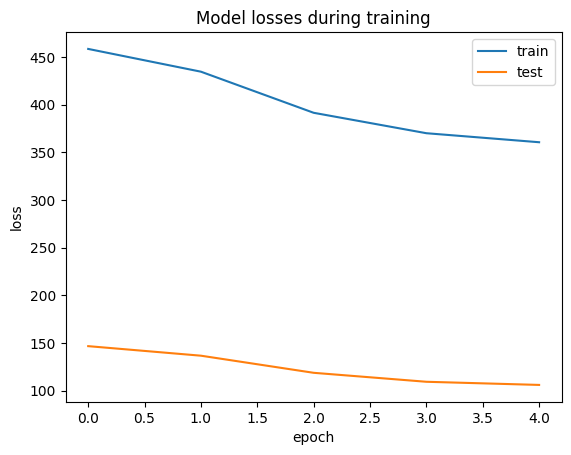

In [32]:
import matplotlib.pyplot as plt

# Plot changes in model loss during training
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model losses during training")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend(["train", "test"], loc="upper right")
plt.show()

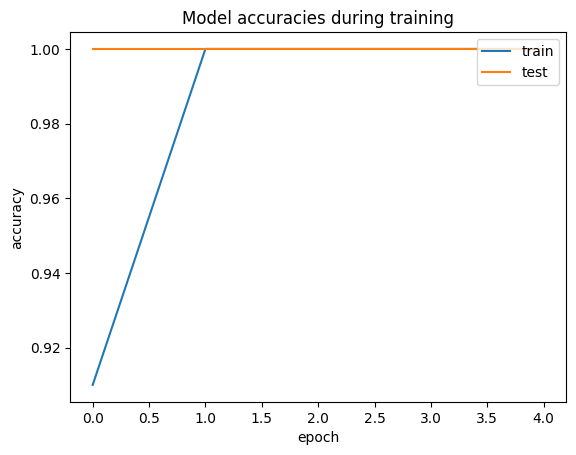

In [33]:

# Plot changes in model accuracy during training
plt.plot(history.history["factorized_top_k/top_5_categorical_accuracy"])
plt.plot(history.history["val_factorized_top_k/top_5_categorical_accuracy"])
plt.title("Model accuracies during training")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend(["train", "test"], loc="upper right")
plt.show()

In [ ]:
print(cached_test.take(1))

<_TakeDataset element_spec={'user_id': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'mount_name': TensorSpec(shape=(None,), dtype=tf.string, name=None), 'level': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'gender': TensorSpec(shape=(None,), dtype=tf.string, name=None), 'age': TensorSpec(shape=(None,), dtype=tf.int64, name=None)}>


In [34]:
# Create a model that takes in raw query features, and
index = tfrs.layers.factorized_top_k.BruteForce(model.query_model)
# recommends movies out of the entire movies dataset.
tes = mount.batch(1)
# index.index_from_dataset(
#   tf.data.Dataset.zip((tes.map(lambda x: x["mount_name"]),tes.map(model.candidate_model)))
# )
index.index_from_dataset(
  tf.data.Dataset.zip((tes.map(lambda x: x["mount_name"]),tes.map(model.candidate_model)))
)
# index.index_from_dataset(
#     tes.map(lambda title: (title, model.candidate_model(title))))



In [35]:
#Get recommendations.
query = {"user_id": np.array([100]),"gender": np.array(["Laki-laki"]),"age": np.array([90]),"level": np.array([3])}
_, titles = index(query)
print(f"Recommendations for user 42: {titles[0, :]}")

Recommendations for user 42: [b'Gunung Arjuno' b'Gunung Semeru' b'Gunung Sumbing' b'Gunung Raung'
 b'Gunung Argupuro' b'Gunung Puntang' b'Gunung Lawu' b'Gunung Sindoro'
 b'Gunung Slamet' b'Gunung Pangrango']


In [36]:
import os
import tempfile

# Export the query model.
with tempfile.TemporaryDirectory() as tmp:
  path = os.path.join(tmp, "model")


  # Save the index.
  tf.saved_model.save(index, path)

  # Load it back; can also be done in TensorFlow Serving.
  loaded = tf.saved_model.load(path)

  # Pass a user id in, get top predicted movie titles back.
  query = {"user_id": np.array([100]),"gender": np.array(["Laki-laki"]),"age": np.array([90]),"level": np.array([3])}

  scores, titles = loaded(query)

  print(f"Recommendations: {titles[0][:3]}")

Recommendations: [b'Gunung Arjuno' b'Gunung Semeru' b'Gunung Sumbing']


In [37]:
model_save_name = 'model.h5'
path = F"/content/gdrive/My Drive/{model_save_name}" 
tf.saved_model.save(index, path)

In [38]:
model_save_name = 'model.h5'
path = F"/content/gdrive/My Drive/{model_save_name}" 
loaded = tf.saved_model.load(path)

# Pass a user id in, get top predicted movie titles back.
query = {"user_id": np.array([100]),"gender": np.array(["Laki-laki"]),"age": np.array([90]),"level": np.array([3])}

scores, titles = loaded(query)

print(f"Recommendations: {titles[0][:3]}")

Recommendations: [b'Gunung Arjuno' b'Gunung Semeru' b'Gunung Sumbing']
